# AC Project - Basketball Playoffs Qualification

This notebook aims to analyse the data related to basketball tournaments, with data from the past seasons.

## 1.Data Collection and Understanding

Here are the types of data present in the datasets:

* awards_players (96 objects) - each record describes awards and prizes received by players across 10 seasons
* coaches (163 objects) - each record describes all coaches who've managed the teams during the time period
* players (894 objects) - each record contains details of all players
* players_teams (1877 objects) - each record describes the performance of each player for each team they played
* series_post (71 objects) - each record describes the series' results
* teams (143 objects) - each record describes the performance of the teams for each season
* teams_post (81 objects) - each record describes the results of each team at the post-season

The goal of this project is to predict which teams will qualify for the playoffs in the next season, using data from players, teams, coaches, games and several other metrics.

**Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import bz2,pickle
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

**Read the Datasets**

In [3]:
awards_players=pd.read_csv('awards_players.csv',header= 0)
awards_players

,playerID,award,year,lgID
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA
...,...,...,...,...
90,boltoru01w,WNBA All Decade Team Honorable Mention,7,WNBA
91,holdsch01w,WNBA All Decade Team Honorable Mention,7,WNBA
92,penicti01w,WNBA All Decade Team Honorable Mention,7,WNBA
93,tauradi01w,WNBA All Decade Team Honorable Mention,7,WNBA


In [4]:
awards_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  95 non-null     object
 1   award     95 non-null     object
 2   year      95 non-null     int64 
 3   lgID      95 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB


In [5]:
coaches=pd.read_csv('coaches.csv',header= 0)
coaches

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0
...,...,...,...,...,...,...,...,...,...
157,wintebr01w,6,IND,WNBA,0,21,13,2,2
158,wintebr01w,7,IND,WNBA,0,21,13,0,2
159,wintebr01w,8,IND,WNBA,0,21,13,3,3
160,zierddo99w,8,MIN,WNBA,0,10,24,0,0


In [6]:
coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coachID      162 non-null    object
 1   year         162 non-null    int64 
 2   tmID         162 non-null    object
 3   lgID         162 non-null    object
 4   stint        162 non-null    int64 
 5   won          162 non-null    int64 
 6   lost         162 non-null    int64 
 7   post_wins    162 non-null    int64 
 8   post_losses  162 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 11.5+ KB


In [7]:
players=pd.read_csv('players.csv',header= 0)
players

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190,George Washington,NaN,1975-09-27,0000-00-00
1,abrossv01w,F,0,0,74.0,169,Connecticut,NaN,1980-07-09,0000-00-00
2,adairje01w,C,0,0,76.0,197,George Washington,NaN,1986-12-19,0000-00-00
3,adamsda01w,F-C,0,0,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,0000-00-00
4,adamsjo01w,C,0,0,75.0,180,New Mexico,NaN,1981-05-24,0000-00-00
...,...,...,...,...,...,...,...,...,...,...
888,zellosh01w,G,0,0,70.0,155,Pittsburgh,NaN,1986-08-28,0000-00-00
889,zhengha01w,C,0,0,80.0,254,NaN,NaN,1967-03-07,0000-00-00
890,zierddo99w,NaN,0,0,0.0,0,NaN,NaN,0000-00-00,0000-00-00
891,zirkozu01w,G,0,0,69.0,145,NaN,NaN,1980-06-06,0000-00-00


In [8]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bioID         893 non-null    object 
 1   pos           815 non-null    object 
 2   firstseason   893 non-null    int64  
 3   lastseason    893 non-null    int64  
 4   height        893 non-null    float64
 5   weight        893 non-null    int64  
 6   college       726 non-null    object 
 7   collegeOther  11 non-null     object 
 8   birthDate     893 non-null    object 
 9   deathDate     893 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 69.9+ KB


In [9]:
players_teams=pd.read_csv('players_teams.csv',header= 0)
players_teams

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,WNBA,26,23,846,343,43,...,0,0,0,0,0,0,0,0,0,0
1,abrossv01w,3,0,MIN,WNBA,27,27,805,314,45,...,0,0,0,0,0,0,0,0,0,0
2,abrossv01w,4,0,MIN,WNBA,30,25,792,318,44,...,1,8,8,22,6,8,8,7,3,0
3,abrossv01w,5,0,MIN,WNBA,22,11,462,146,17,...,2,3,7,23,8,4,2,8,2,0
4,abrossv01w,6,0,MIN,WNBA,31,31,777,304,29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,zakalok01w,3,2,PHO,WNBA,5,0,37,6,0,...,0,0,0,0,0,0,0,0,0,0
1872,zarafr01w,6,0,SEA,WNBA,34,4,413,90,11,...,0,5,0,6,4,2,2,1,1,0
1873,zellosh01w,10,0,DET,WNBA,34,4,802,406,25,...,3,7,15,68,24,27,23,17,7,0
1874,zirkozu01w,4,0,WAS,WNBA,6,0,30,11,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
players_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   playerID            1876 non-null   object
 1   year                1876 non-null   int64 
 2   stint               1876 non-null   int64 
 3   tmID                1876 non-null   object
 4   lgID                1876 non-null   object
 5   GP                  1876 non-null   int64 
 6   GS                  1876 non-null   int64 
 7   minutes             1876 non-null   int64 
 8   points              1876 non-null   int64 
 9   oRebounds           1876 non-null   int64 
 10  dRebounds           1876 non-null   int64 
 11  rebounds            1876 non-null   int64 
 12  assists             1876 non-null   int64 
 13  steals              1876 non-null   int64 
 14  blocks              1876 non-null   int64 
 15  turnovers           1876 non-null   int64 
 16  PF                  1876

In [11]:
series_post=pd.read_csv('series_post.csv',header= 0)
series_post

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L
0,1,FR,A,CLE,WNBA,ORL,WNBA,2,1
1,1,FR,B,NYL,WNBA,WAS,WNBA,2,0
2,1,FR,C,LAS,WNBA,PHO,WNBA,2,0
3,1,FR,D,HOU,WNBA,SAC,WNBA,2,0
4,1,CF,E,HOU,WNBA,LAS,WNBA,2,0
...,...,...,...,...,...,...,...,...,...
65,10,FR,C,IND,WNBA,WAS,WNBA,2,0
66,10,FR,D,DET,WNBA,ATL,WNBA,2,0
67,10,CF,E,PHO,WNBA,LAS,WNBA,2,1
68,10,CF,F,IND,WNBA,DET,WNBA,2,1


In [12]:
series_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        70 non-null     int64 
 1   round       70 non-null     object
 2   series      70 non-null     object
 3   tmIDWinner  70 non-null     object
 4   lgIDWinner  70 non-null     object
 5   tmIDLoser   70 non-null     object
 6   lgIDLoser   70 non-null     object
 7   W           70 non-null     int64 
 8   L           70 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 5.0+ KB


In [13]:
teams=pd.read_csv('teams.csv',header= 0)
teams

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6,WNBA,WAS,WAS,EA,NaN,5,N,0,NaN,...,34,10,7,6,11,9,11,6900,171501,Verizon Center
138,7,WNBA,WAS,WAS,EA,NaN,4,Y,0,L,...,34,13,4,5,12,12,8,6850,133255,Verizon Center
139,8,WNBA,WAS,WAS,EA,NaN,5,N,0,NaN,...,34,8,9,8,9,8,12,6900,133255,Verizon Center
140,9,WNBA,WAS,WAS,EA,NaN,6,N,0,NaN,...,34,6,11,4,13,6,14,6825,154637,Verizon Center


In [14]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        142 non-null    int64  
 1   lgID        142 non-null    object 
 2   tmID        142 non-null    object 
 3   franchID    142 non-null    object 
 4   confID      142 non-null    object 
 5   divID       0 non-null      float64
 6   rank        142 non-null    int64  
 7   playoff     142 non-null    object 
 8   seeded      142 non-null    int64  
 9   firstRound  80 non-null     object 
 10  semis       38 non-null     object 
 11  finals      20 non-null     object 
 12  name        142 non-null    object 
 13  o_fgm       142 non-null    int64  
 14  o_fga       142 non-null    int64  
 15  o_ftm       142 non-null    int64  
 16  o_fta       142 non-null    int64  
 17  o_3pm       142 non-null    int64  
 18  o_3pa       142 non-null    int64  
 19  o_oreb      142 non-null    i

In [15]:
teams_post=pd.read_csv('teams_post.csv',header= 0)
teams_post

,year,tmID,lgID,W,L
0,1,HOU,WNBA,6,0
1,1,ORL,WNBA,1,2
2,1,CLE,WNBA,3,3
3,1,WAS,WNBA,0,2
4,1,NYL,WNBA,4,3
...,...,...,...,...,...
75,10,SAS,WNBA,1,2
76,10,PHO,WNBA,7,4
77,10,SEA,WNBA,1,2
78,10,LAS,WNBA,3,3


In [16]:
teams_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    80 non-null     int64 
 1   tmID    80 non-null     object
 2   lgID    80 non-null     object
 3   W       80 non-null     int64 
 4   L       80 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.2+ KB


## 2. Data Analysis

Analyse datasets teams and players_teams.

**Analyse Teams**

In [17]:
teams.shape

(142, 61)

In [18]:
teams.corr()

,year,divID,rank,seeded,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend
year,1.000000,NaN,-0.119087,NaN,0.723314,0.820357,0.557302,0.513862,0.421949,0.435412,...,0.077097,0.811893,0.115085,0.013766,0.015118,0.126150,-0.042705,-0.042705,0.820521,-0.154491
divID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,-0.119087,NaN,1.000000,NaN,-0.339845,-0.128011,-0.230563,-0.163606,-0.117247,-0.052629,...,0.869440,-0.142208,-0.797081,0.781505,-0.775317,0.742283,-0.851473,0.861650,-0.129498,-0.192151
seeded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
o_fgm,0.723314,NaN,-0.339845,NaN,1.000000,0.900705,0.609655,0.527834,0.397704,0.380516,...,-0.251280,0.603375,0.295686,-0.201819,0.349266,-0.240654,0.243734,-0.295025,0.591657,-0.056243
o_fga,0.820357,NaN,-0.128011,NaN,0.900705,1.000000,0.596715,0.547350,0.423779,0.457988,...,-0.009763,0.691321,0.103301,0.006367,0.146507,-0.024785,0.037817,-0.087506,0.699076,-0.133068
o_ftm,0.557302,NaN,-0.230563,NaN,0.609655,0.596715,1.000000,0.933098,0.140181,0.142361,...,-0.202764,0.432941,0.245884,-0.178835,0.254805,-0.176827,0.171297,-0.223184,0.408720,-0.285847
o_fta,0.513862,NaN,-0.163606,NaN,0.527834,0.547350,0.933098,1.000000,-0.011750,-0.006907,...,-0.122887,0.419638,0.189486,-0.124058,0.164842,-0.090141,0.104435,-0.160619,0.393891,-0.301192
o_3pm,0.421949,NaN,-0.117247,NaN,0.397704,0.423779,0.140181,-0.011750,1.000000,0.970076,...,-0.070915,0.304621,0.075560,-0.027506,0.154509,-0.099909,0.060716,-0.097652,0.315037,-0.035123
o_3pa,0.435412,NaN,-0.052629,NaN,0.380516,0.457988,0.142361,-0.006907,0.970076,1.000000,...,-0.012656,0.310934,0.027787,0.021707,0.101878,-0.046745,0.008511,-0.048890,0.325609,-0.061654


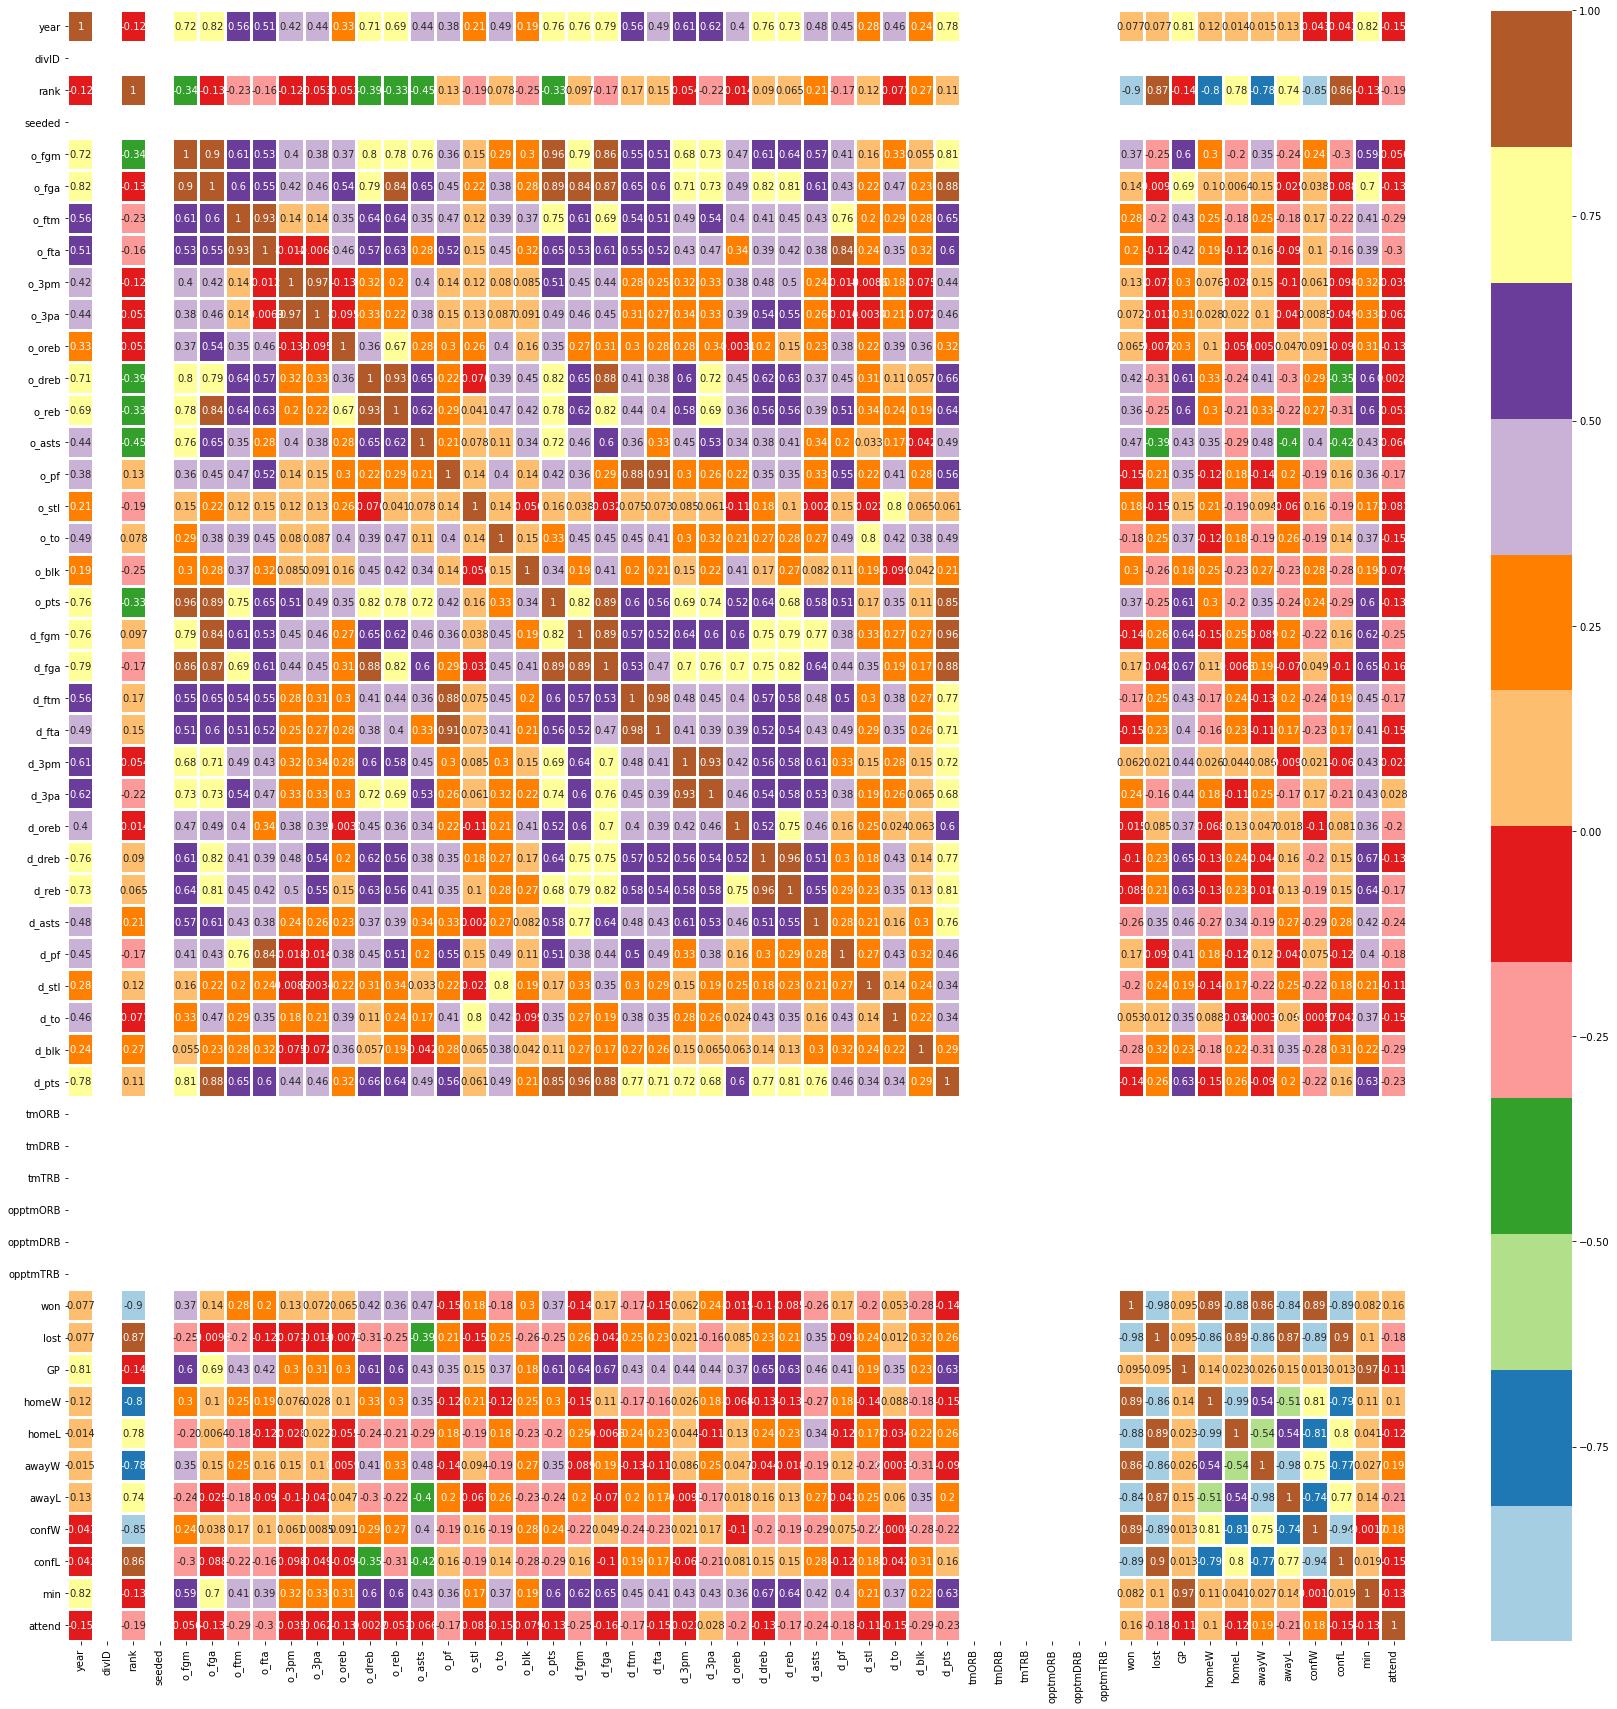

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(teams.corr(),linewidths=2,annot= True,cmap = "Paired")

Text(0.5, 1.0, 'Qualified for playoffs? \n Y-Qualified   N- Not qualified')

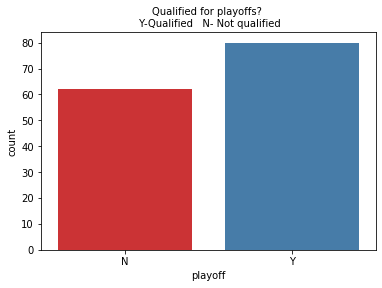

In [20]:
sns.countplot(x='playoff', data=teams, palette='Set1')
plt.title('Qualified for playoffs? \n Y-Qualified   N- Not qualified', fontsize=10)

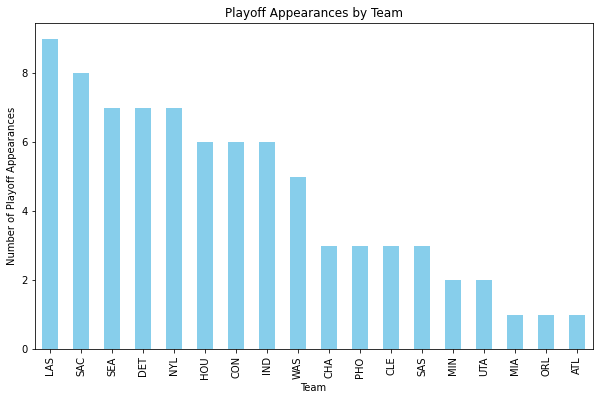

In [21]:
playoff_df = teams[teams['playoff'] == 'Y']
team_playoff_counts = playoff_df['tmID'].value_counts()
plt.figure(figsize=(10, 6))
team_playoff_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Team')
plt.ylabel('Number of Playoff Appearances')
plt.title('Playoff Appearances by Team')
plt.show()

Then we created a plot to show how the ranking of teams has changed over the years.
This can highlight teams that consistently perform well or experience fluctuations in their rankings.

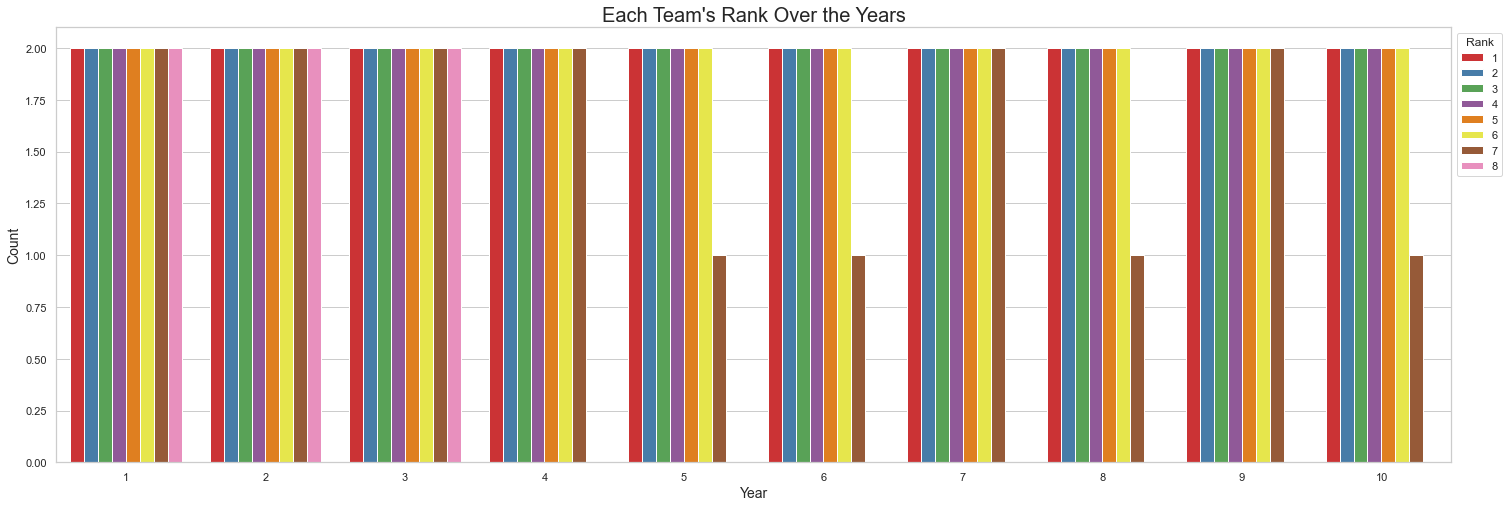

In [76]:
plt.figure(figsize=(25, 8))
sns.countplot(x='year', hue='rank', data=teams, palette='Set1')
plt.title('Each Team\'s Rank Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Rank', bbox_to_anchor=(1, 1))
plt.show()

Next we have a line plot showing the points scored by each team over the years.
This will help us understand the overall trend in team performance

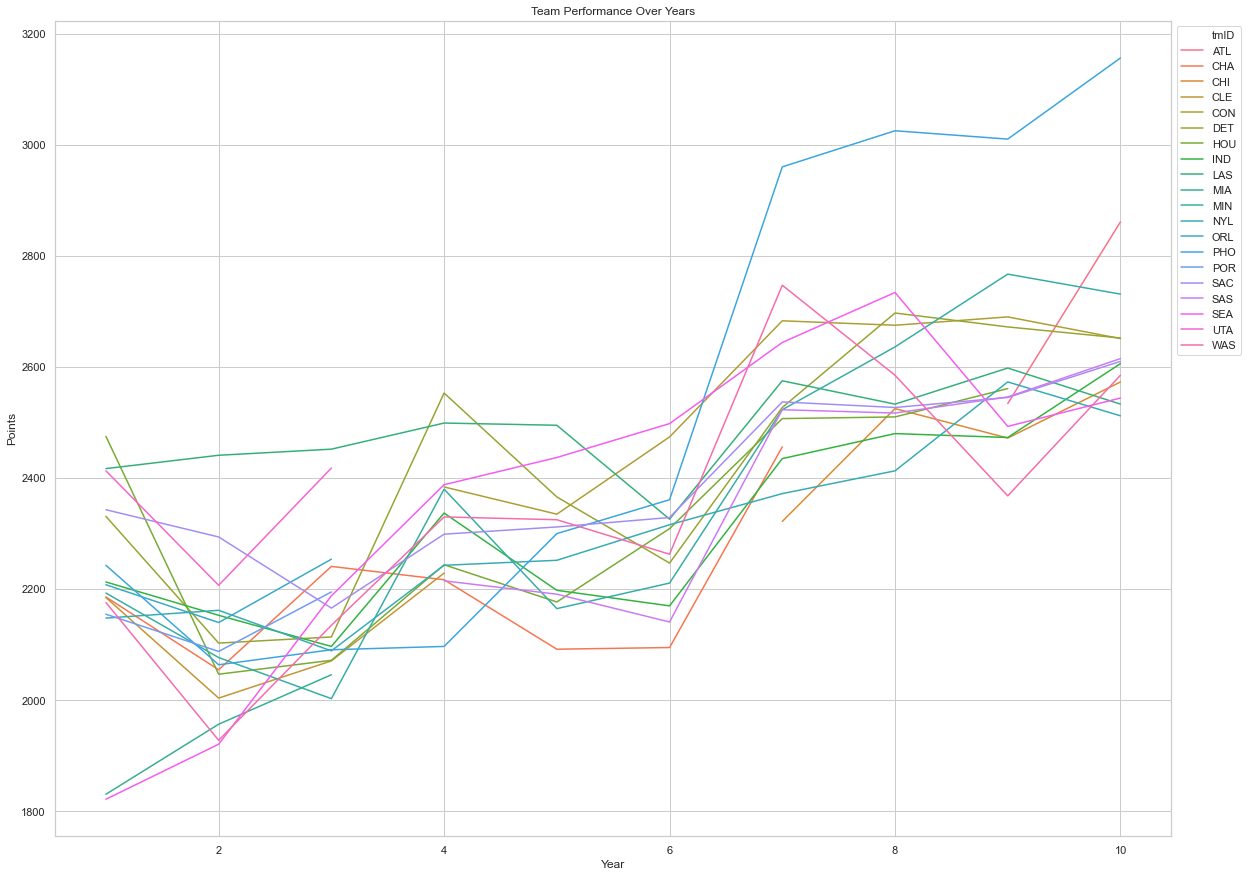

In [56]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='year', y='o_pts', hue='tmID', data=teams)
plt.title('Team Performance Over Years')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Next we have a bar plot comparing the total points scored by different teams in a specific year. 
This will allow us to see which teams performed better in a particular season.

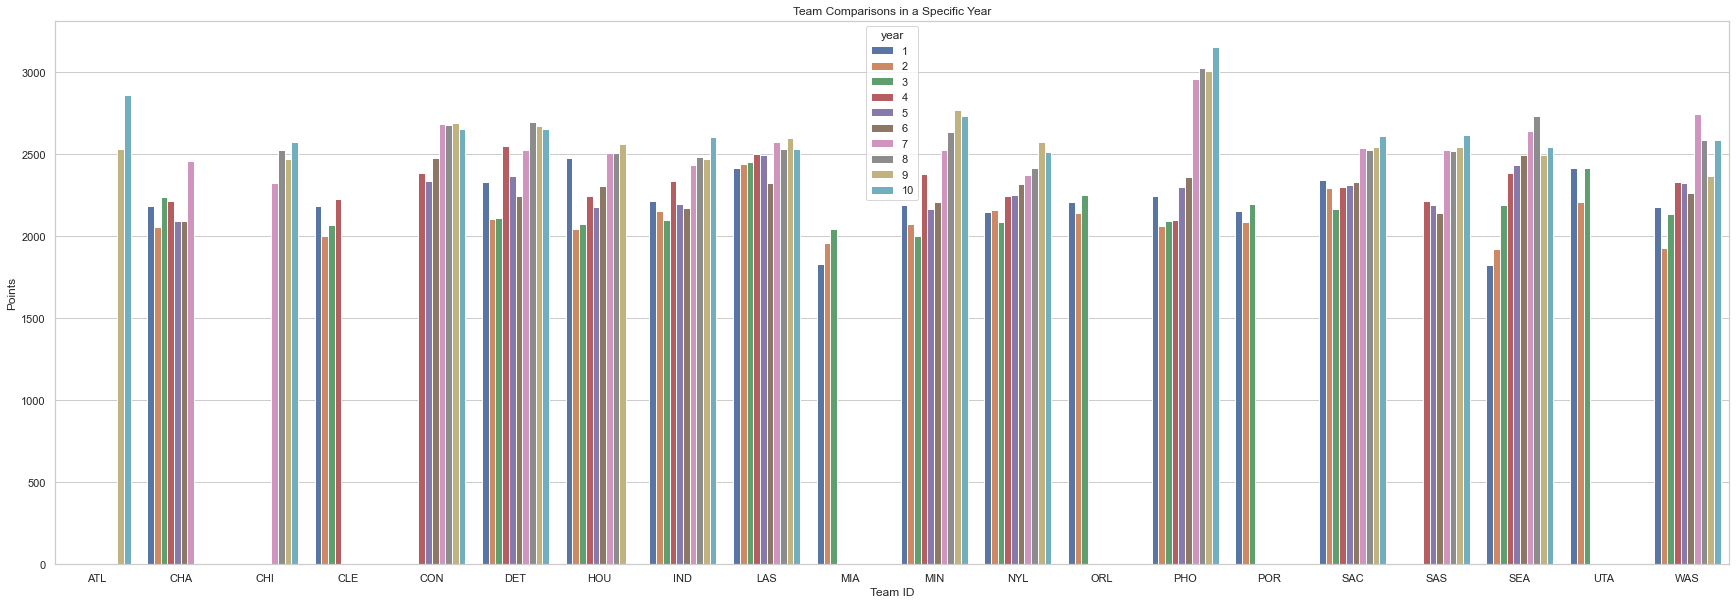

In [61]:
plt.figure(figsize=(30, 10))
sns.barplot(x='tmID', y='o_pts', hue='year', data=teams)
plt.title('Team Comparisons in a Specific Year')
plt.xlabel('Team ID')
plt.ylabel('Points')
plt.show()

Next we have a scatter plot to explore the relationship between the number of field goals made (o_fgm and d_fgm) and points scored. 
This can help us identify teams that are more efficient in converting field goals into points.

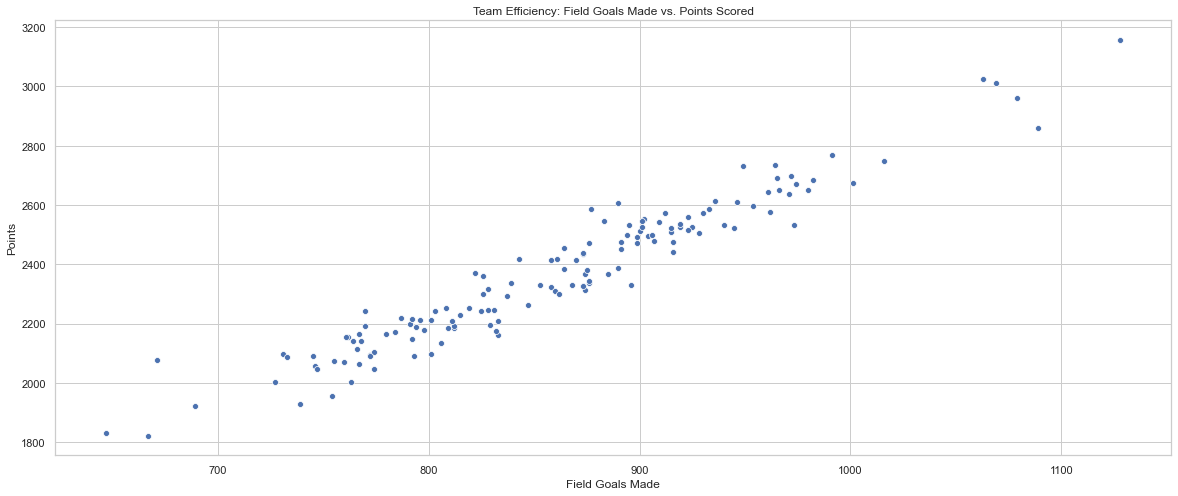

In [64]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='o_fgm', y='o_pts', data=teams)
plt.title('Team Efficiency: Field Goals Made vs. Points Scored')
plt.xlabel('Field Goals Made')
plt.ylabel('Points')
plt.show()

Nextwe have a stacked bar plot to compare the number of wins and losses for each team at home and away. 
This can provide insights into the teams' home court advantage.

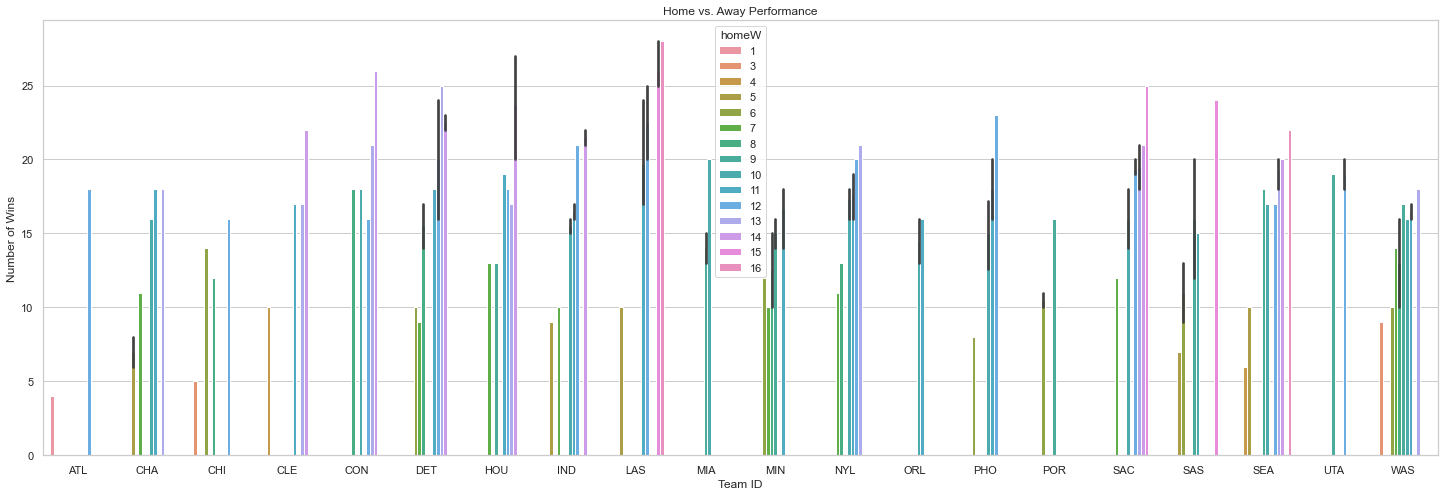

In [67]:
plt.figure(figsize=(25, 8))
sns.barplot(x='tmID', y='won', hue='homeW', data=teams)
plt.title('Home vs. Away Performance')
plt.xlabel('Team ID')
plt.ylabel('Number of Wins')
plt.show()

Now we decide to plot the attendance over the years for each team. 
This can help us identify trends in fan engagement and popularity of teams.

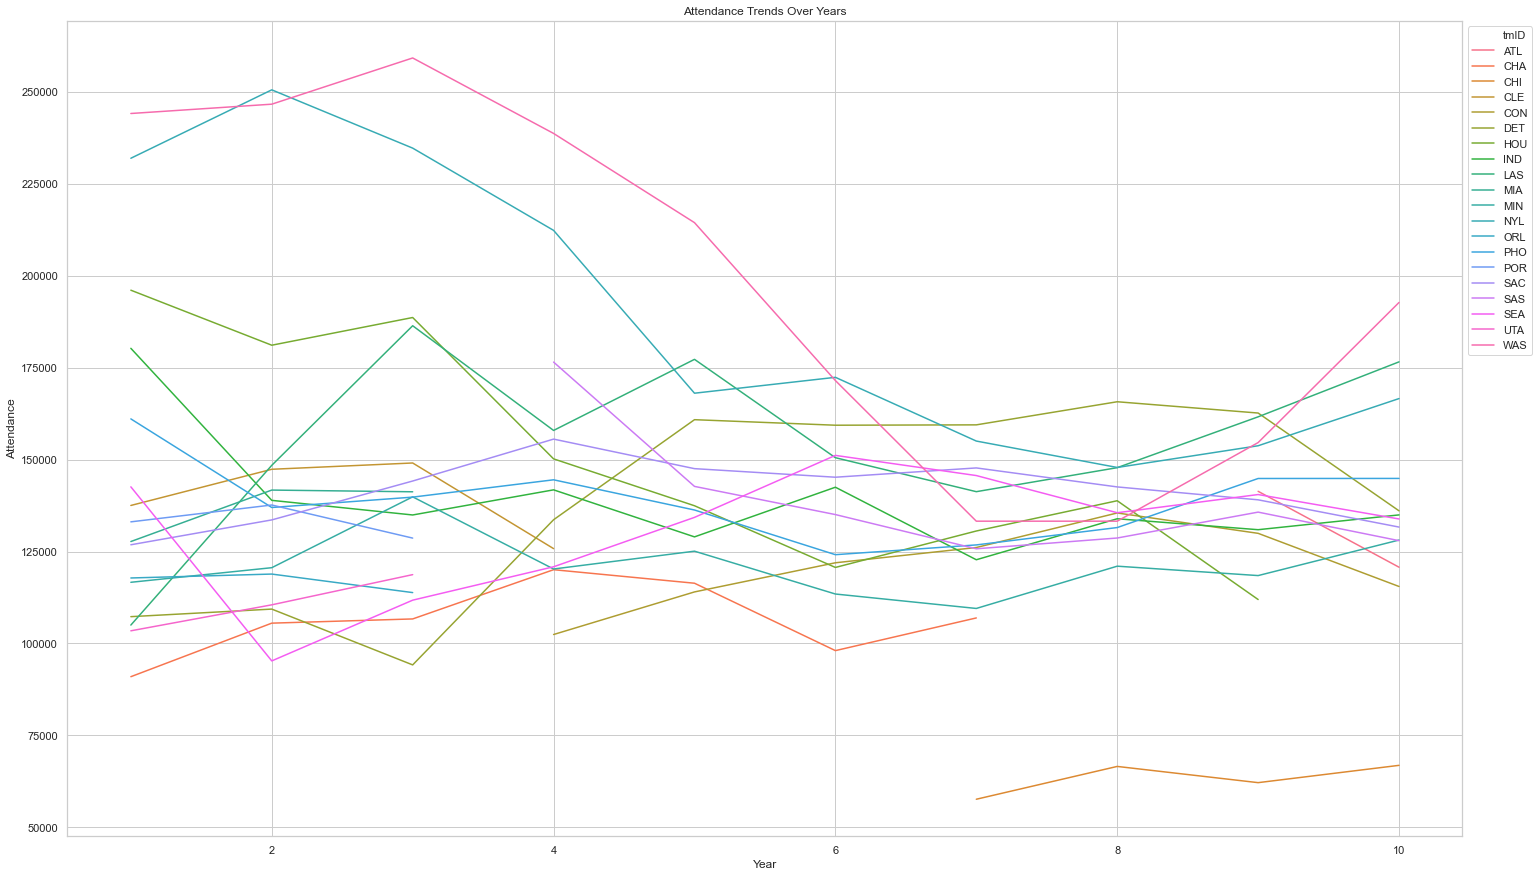

In [70]:
plt.figure(figsize=(25, 15))
sns.lineplot(x='year', y='attend', hue='tmID', data=teams)
plt.title('Attendance Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Analyse Players_teams**

In [24]:
players_teams.shape

(1876, 43)

In [25]:
players_teams.corr()

,year,stint,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
year,1.000000,0.062341,0.034124,0.009067,0.010770,0.066935,0.024391,0.074682,0.060390,0.033366,...,0.047456,0.087071,0.100995,0.093332,0.092182,0.091918,0.093256,0.078846,0.081513,0.056642
stint,0.062341,1.000000,-0.304812,-0.170542,-0.223583,-0.191554,-0.172259,-0.190027,-0.190801,-0.161329,...,-0.068464,-0.092877,-0.094136,-0.094589,-0.093518,-0.089214,-0.084700,-0.072114,-0.066298,-0.041961
GP,0.034124,-0.304812,1.000000,0.584068,0.793045,0.648608,0.587854,0.651921,0.653527,0.575178,...,0.205572,0.323509,0.336733,0.322116,0.304306,0.275396,0.269037,0.247192,0.224922,0.103001
GS,0.009067,-0.170542,0.584068,1.000000,0.897240,0.821495,0.630934,0.780604,0.757938,0.722497,...,0.265731,0.415720,0.392225,0.435492,0.421469,0.380495,0.382638,0.330304,0.296537,0.146329
minutes,0.010770,-0.223583,0.793045,0.897240,1.000000,0.912233,0.703329,0.845866,0.827926,0.785820,...,0.287484,0.458822,0.439043,0.479237,0.459476,0.419015,0.418243,0.370339,0.336257,0.158207
points,0.066935,-0.191554,0.648608,0.821495,0.912233,1.000000,0.694410,0.835055,0.817369,0.669425,...,0.323421,0.464524,0.428574,0.522263,0.512914,0.478941,0.482102,0.381316,0.351277,0.158308
oRebounds,0.024391,-0.172259,0.587854,0.630934,0.703329,0.694410,1.000000,0.846165,0.928123,0.302628,...,0.378227,0.333549,0.389855,0.350788,0.367483,0.392191,0.368120,0.065534,0.054961,0.158087
dRebounds,0.074682,-0.190027,0.651921,0.780604,0.845866,0.835055,0.846165,1.000000,0.983738,0.529190,...,0.450843,0.441428,0.470609,0.467867,0.467830,0.454738,0.443281,0.246533,0.223929,0.188405
rebounds,0.060390,-0.190801,0.653527,0.757938,0.827926,0.817369,0.928123,0.983738,1.000000,0.471663,...,0.442412,0.420777,0.460139,0.445057,0.450657,0.449840,0.433724,0.194304,0.174950,0.184891
assists,0.033366,-0.161329,0.575178,0.722497,0.785820,0.669425,0.302628,0.529190,0.471663,1.000000,...,0.128489,0.450244,0.339437,0.416352,0.377352,0.349780,0.360505,0.431707,0.380693,0.128635


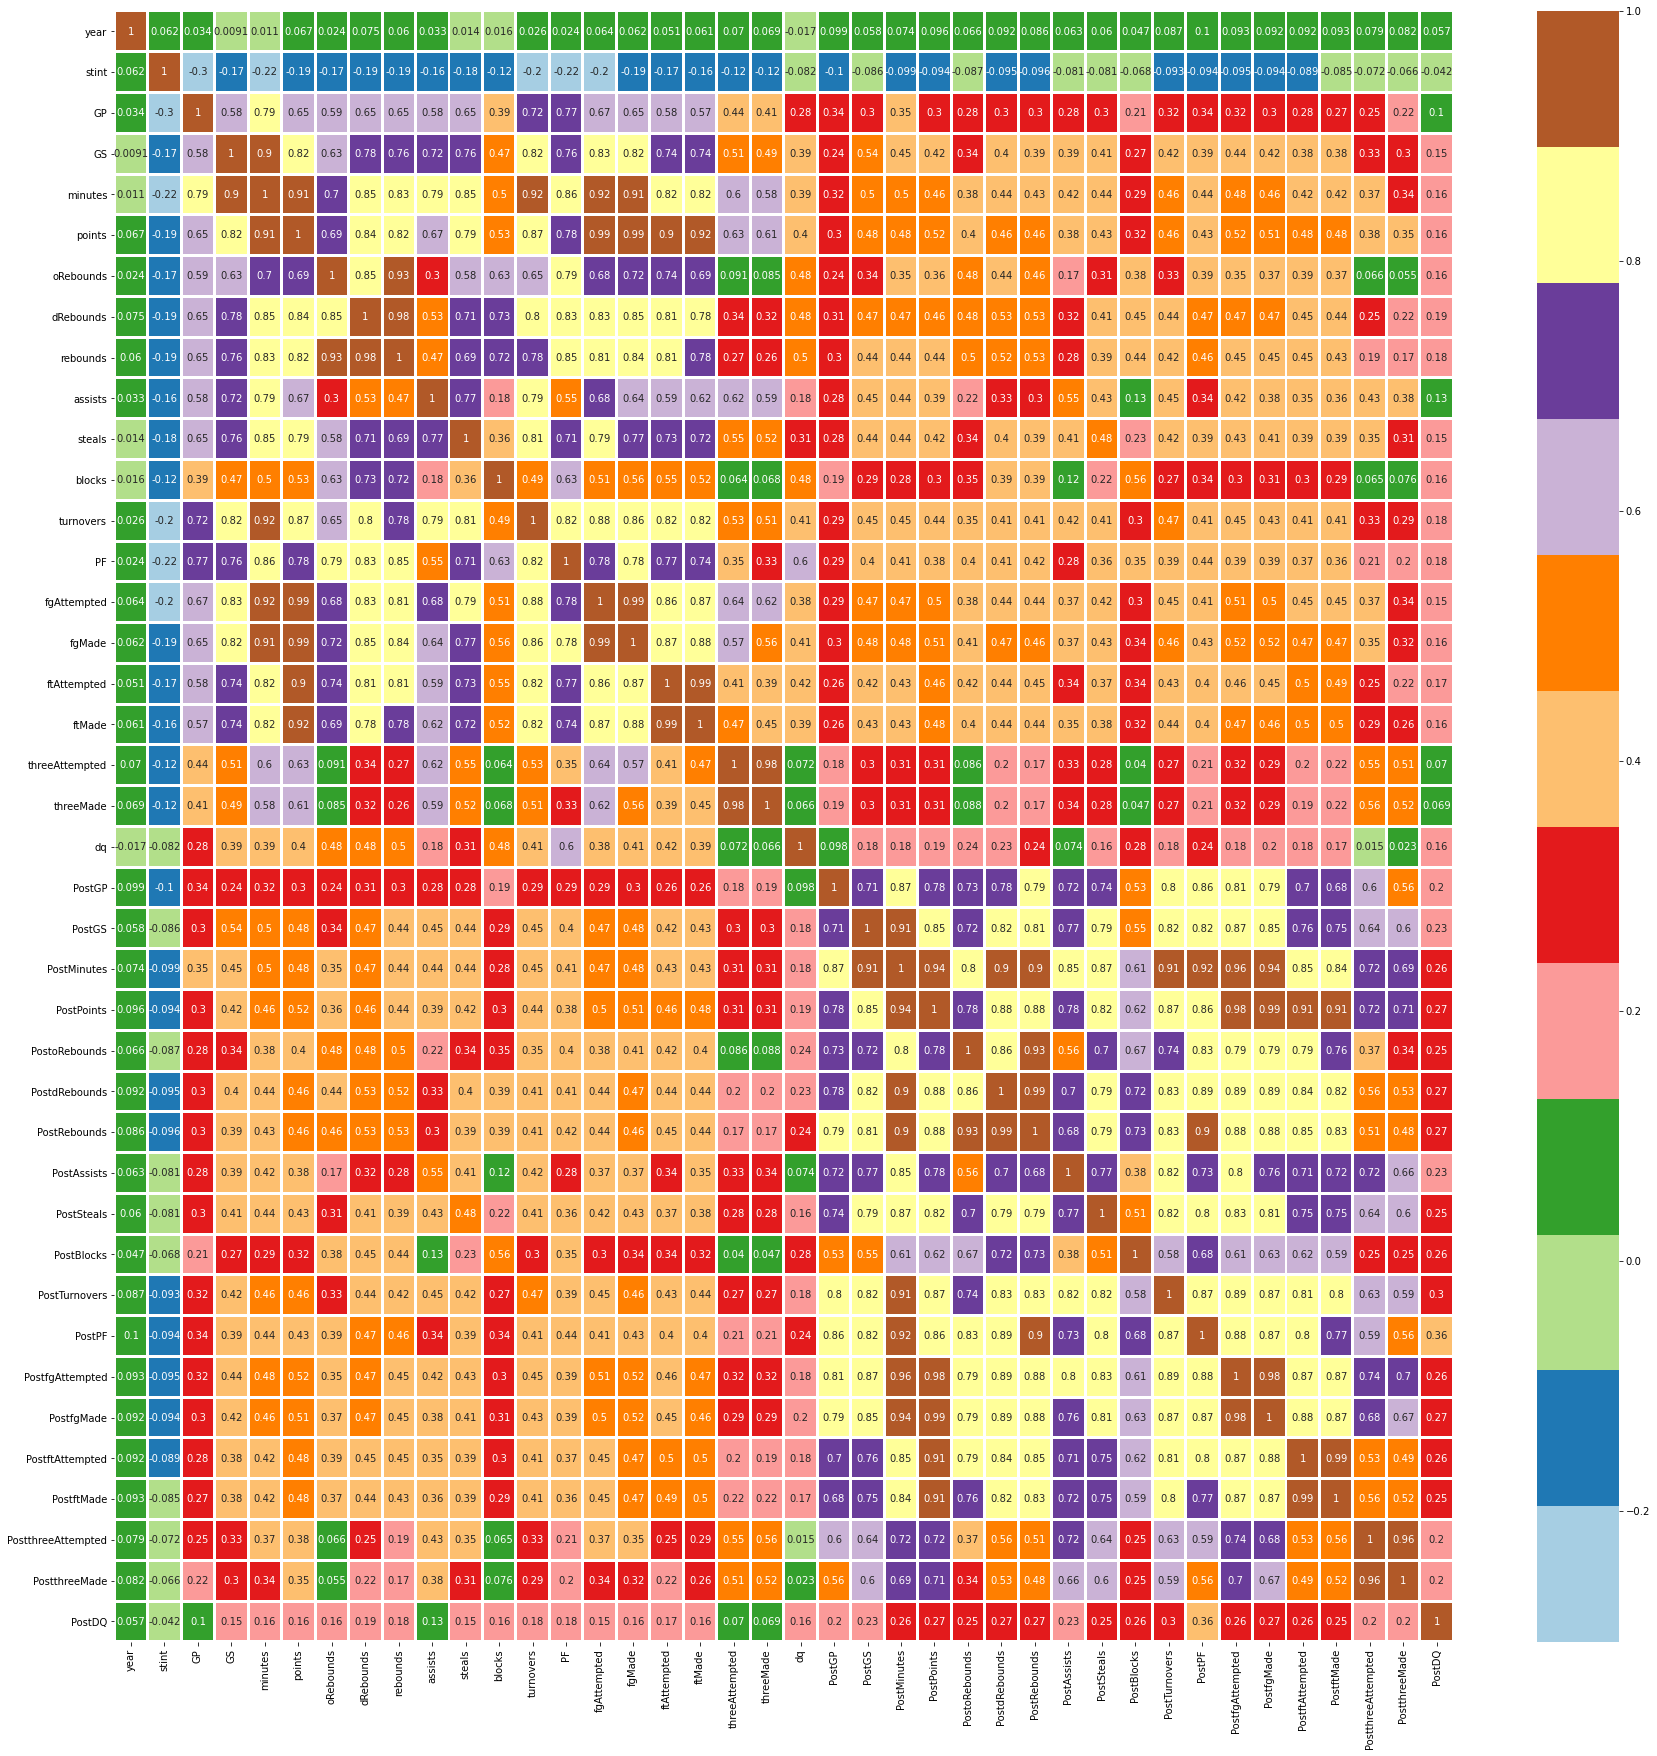

In [26]:
plt.figure(figsize=(30,30))
sns.heatmap(players_teams.corr(),linewidths=2,annot= True,cmap = "Paired")

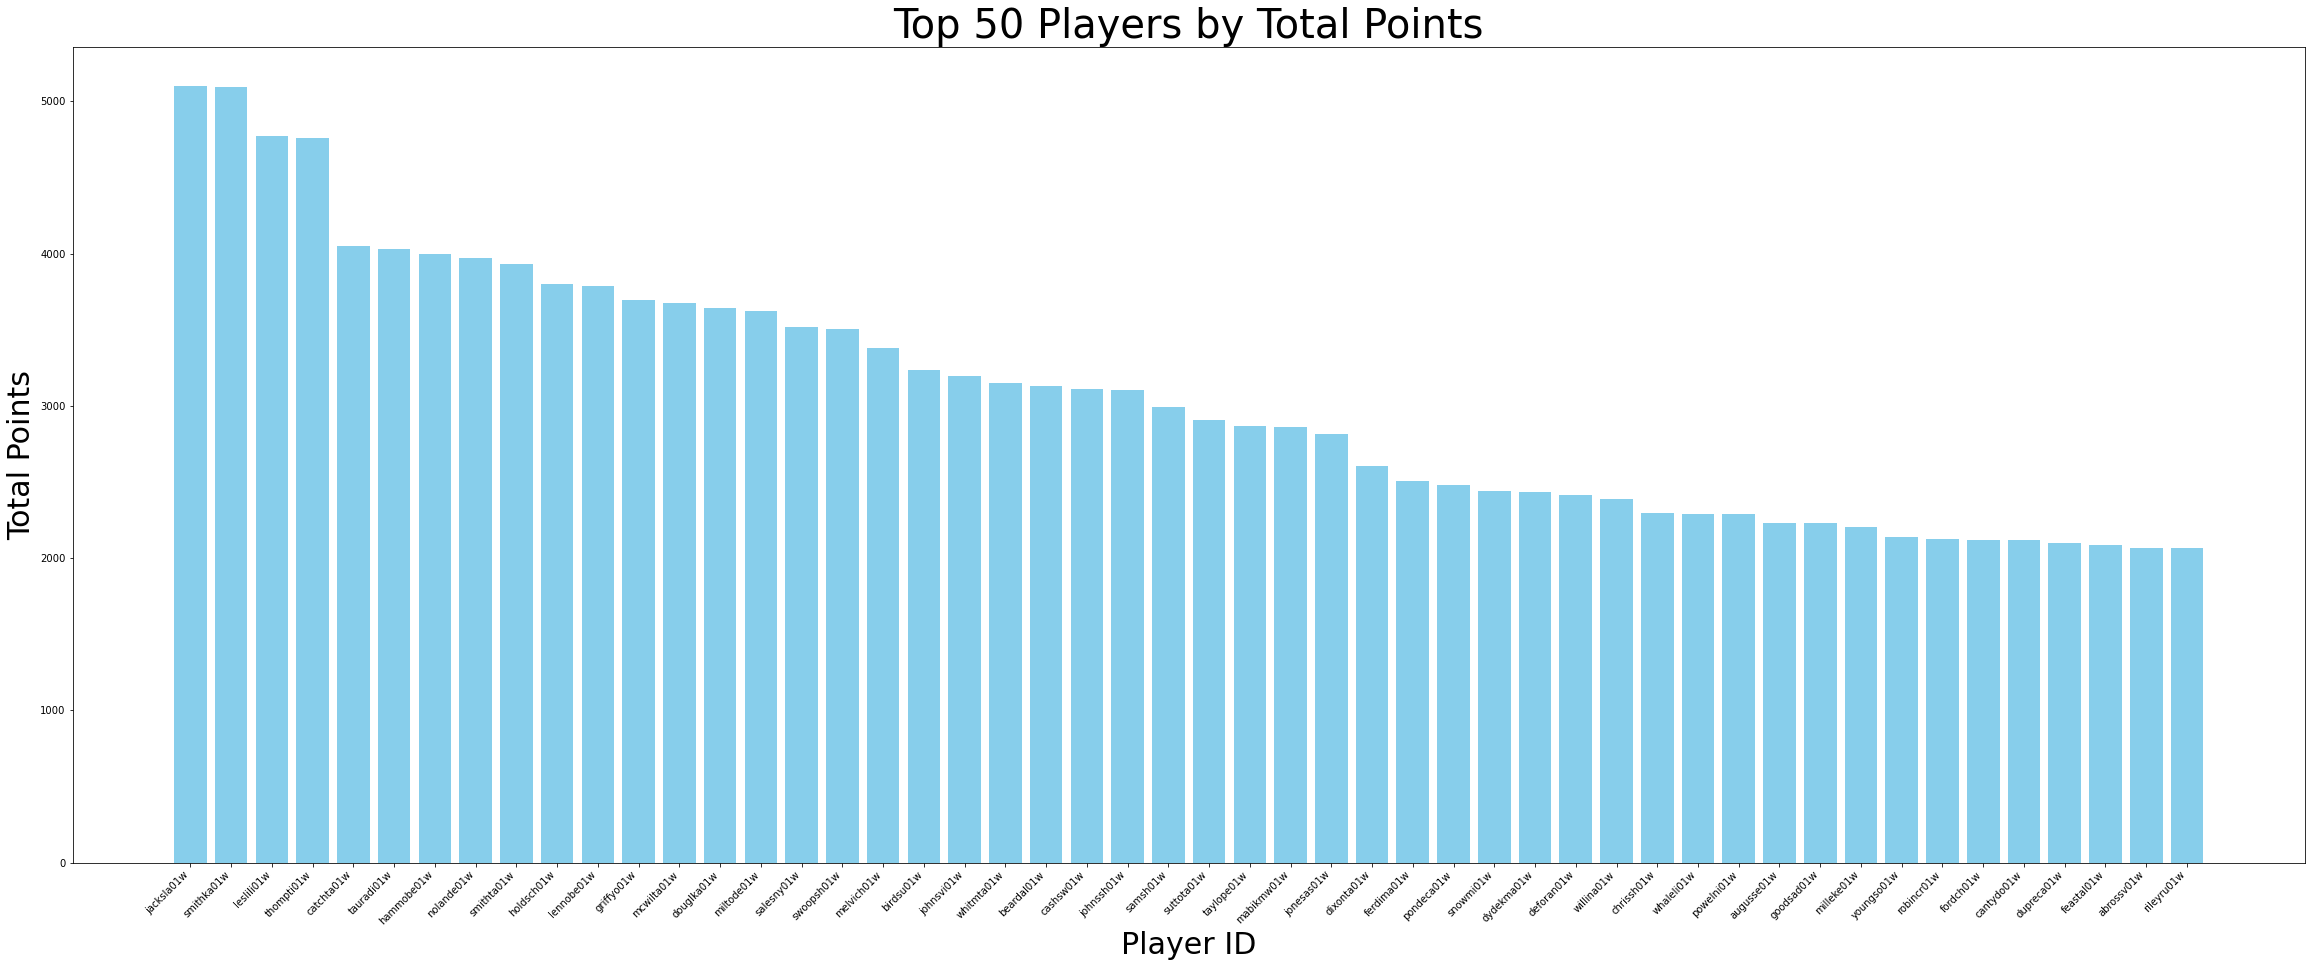

In [29]:
total_points = players_teams.groupby('playerID')['points'].sum().reset_index()
total_points_sorted = total_points.sort_values(by='points', ascending=False)
top_50_players = total_points_sorted.head(50)
plt.figure(figsize=(40, 15))
plt.bar(top_50_players['playerID'], top_50_players['points'], color='skyblue')
plt.xlabel('Player ID', fontsize = 30)
plt.ylabel('Total Points', fontsize=30)
plt.title('Top 50 Players by Total Points', fontsize=40)
plt.xticks(rotation=45, ha='right')
plt.show()







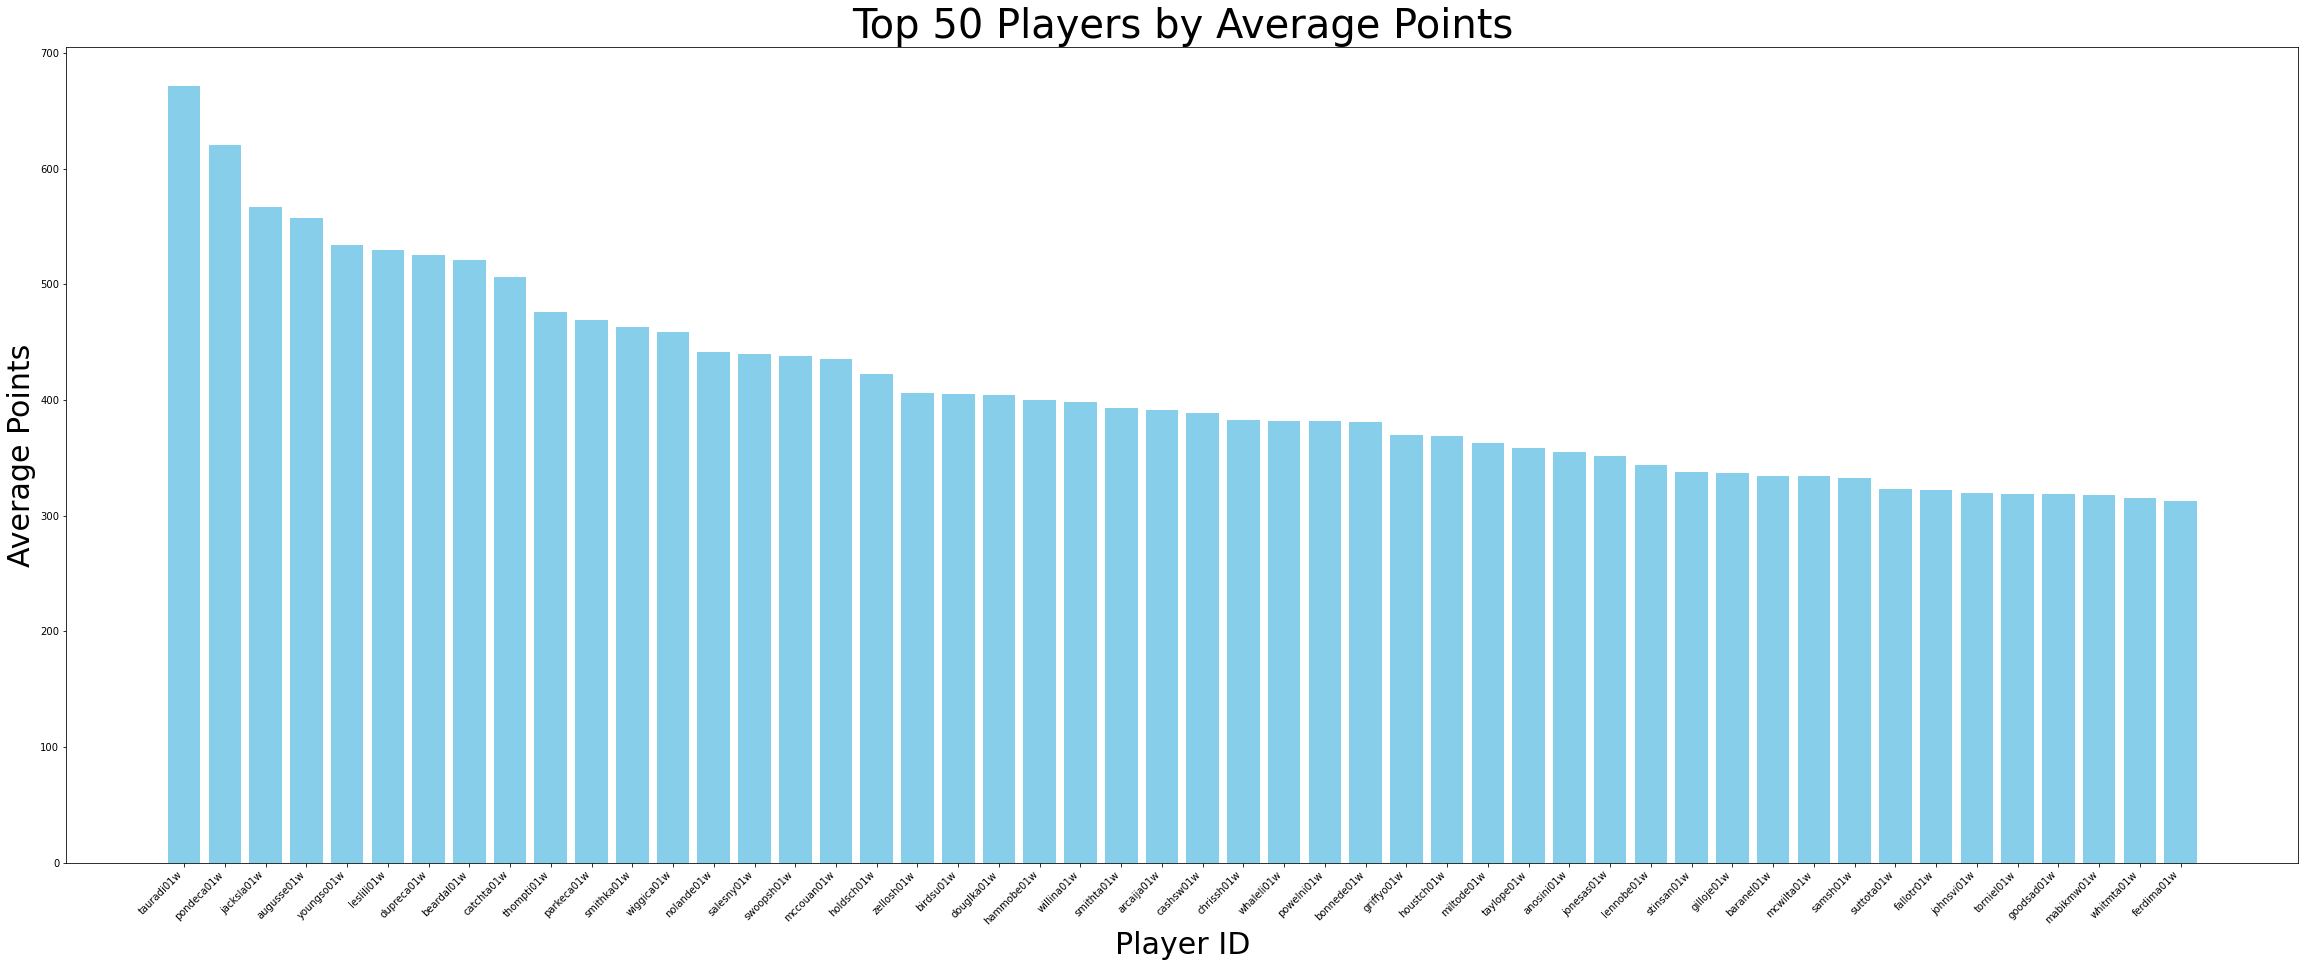

In [30]:
average_points = players_teams.groupby('playerID')['points'].mean().reset_index()
average_points_sorted = average_points.sort_values(by='points', ascending=False)
top_50_players_avg = average_points_sorted.head(50)

plt.figure(figsize=(40, 15))
plt.bar(top_50_players_avg['playerID'], top_50_players_avg['points'], color='skyblue')
plt.xlabel('Player ID', fontsize=30)
plt.ylabel('Average Points', fontsize=30)
plt.title('Top 50 Players by Average Points', fontsize=40)
plt.xticks(rotation=45, ha='right')
plt.show()

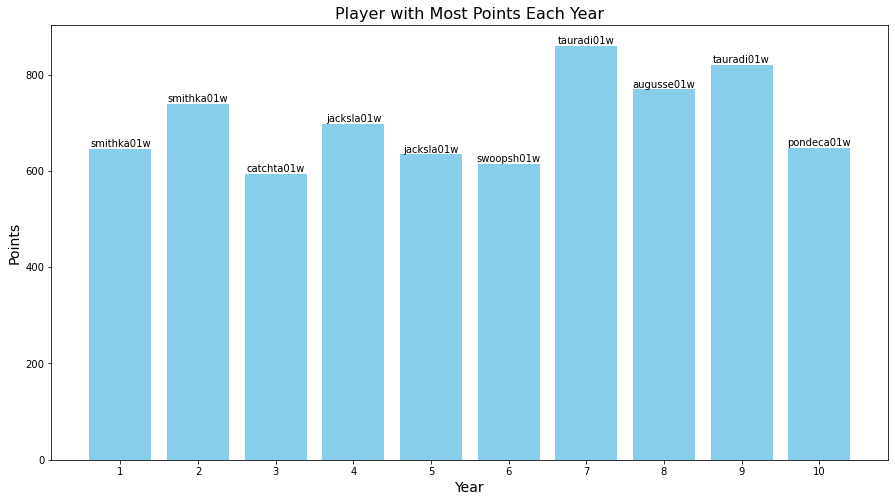

In [33]:
max_points_players = players_teams.loc[players_teams.groupby('year')['points'].idxmax()]

plt.figure(figsize=(15, 8))
bars = plt.bar(max_points_players['year'].astype(str), max_points_players['points'], color='skyblue')

for bar, player in zip(bars, max_points_players['playerID']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), player, ha='center', va='bottom')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.title('Player with Most Points Each Year', fontsize=16)
plt.show()

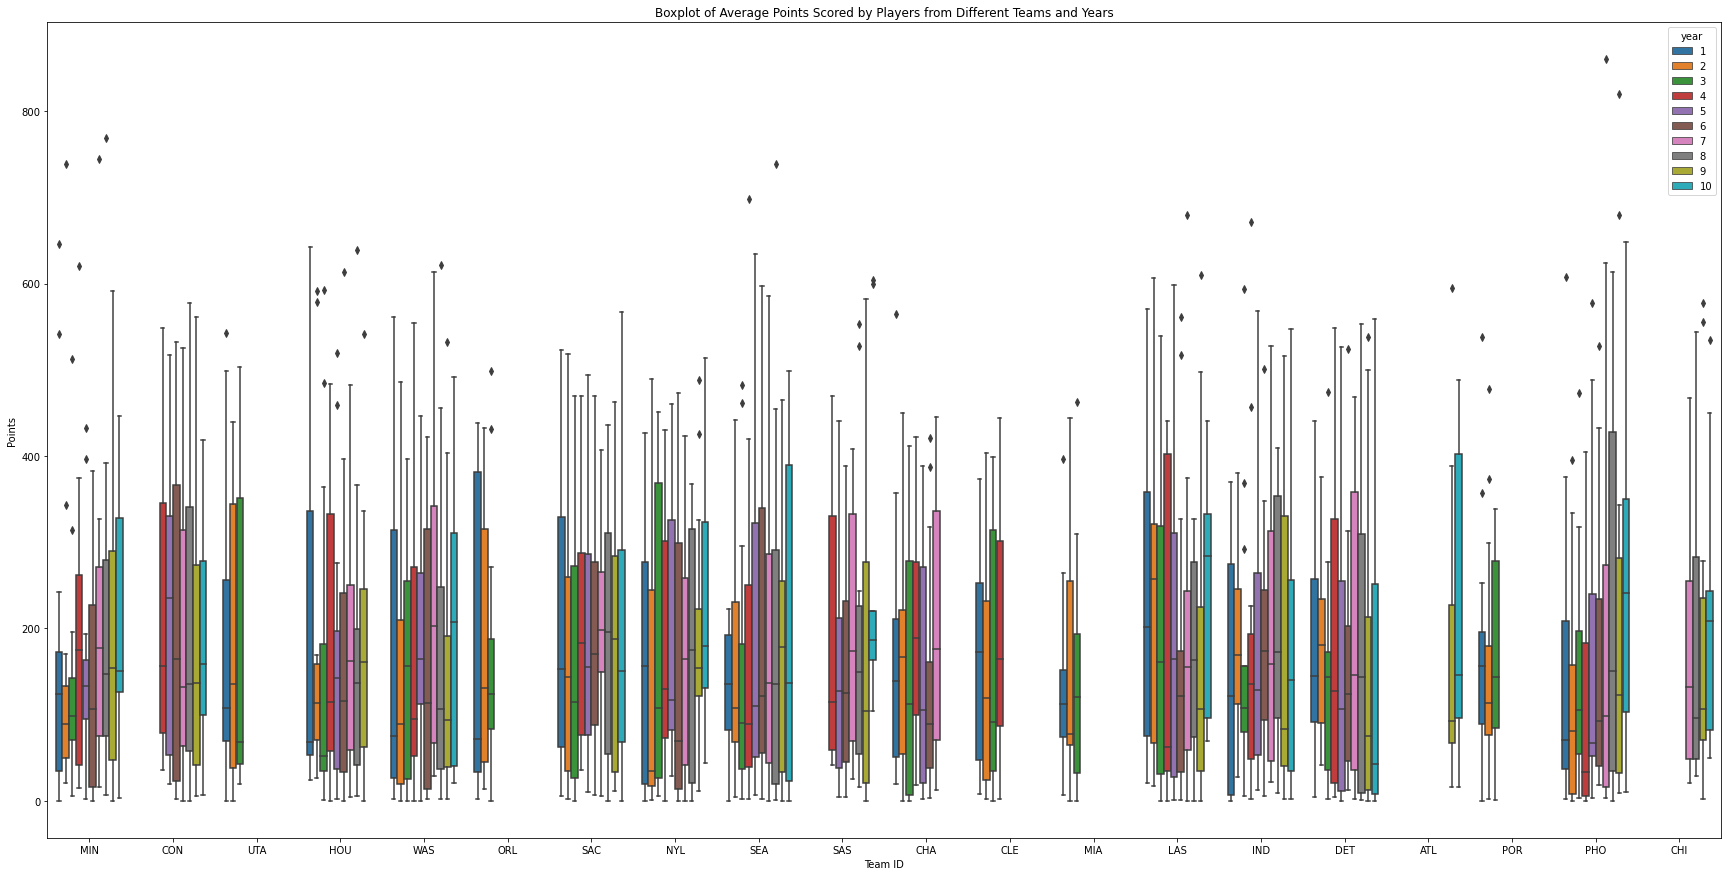

In [42]:
plt.figure(figsize=(30,15))
sns.boxplot(x='tmID', y='points', hue='year', data=players_teams)
plt.title('Boxplot of Average Points Scored by Players from Different Teams and Years')
plt.xlabel('Team ID')
plt.ylabel('Points')
plt.show()

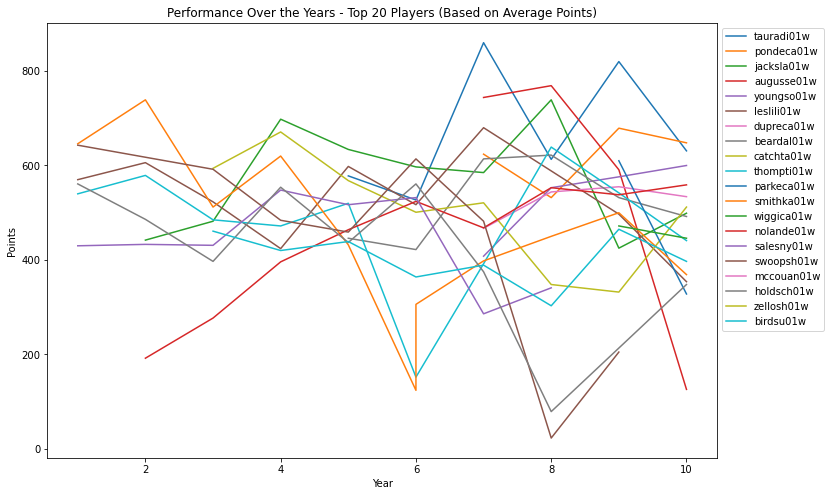

In [45]:
average_points = players_teams.groupby('playerID')['points'].mean().sort_values(ascending=False)
top_20_players = average_points.head(20).index
df_top_20 = players_teams[players_teams['playerID'].isin(top_20_players)]
plt.figure(figsize=(12, 8))
for player in top_20_players:
    player_data = df_top_20[df_top_20['playerID'] == player]
    plt.plot(player_data['year'], player_data['points'], label=player)

plt.title('Performance Over the Years - Top 20 Players (Based on Average Points)')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

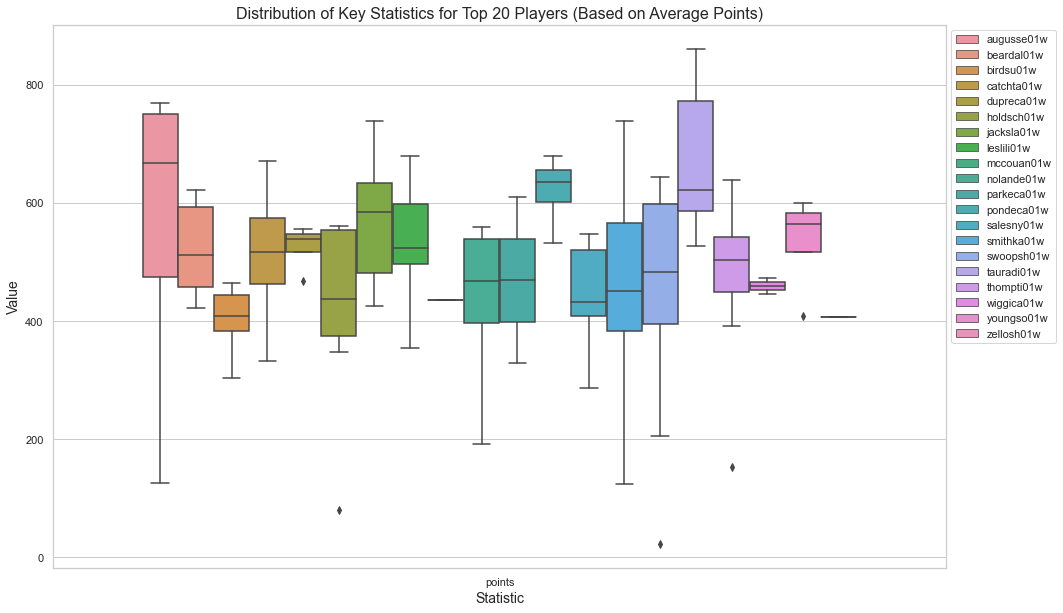

In [52]:
average_points = players_teams.groupby('playerID')['points'].mean().sort_values(ascending=False)
top_20_players = average_points.head(20).index
df_top_20 = players_teams[players_teams['playerID'].isin(top_20_players)]
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
sns.boxplot(x='variable', y='value', hue='playerID', data=pd.melt(df_top_20[['playerID', 'points']], id_vars='playerID', var_name='variable', value_name='value'))
plt.xlabel('Statistic', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Distribution of Key Statistics for Top 20 Players (Based on Average Points)', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

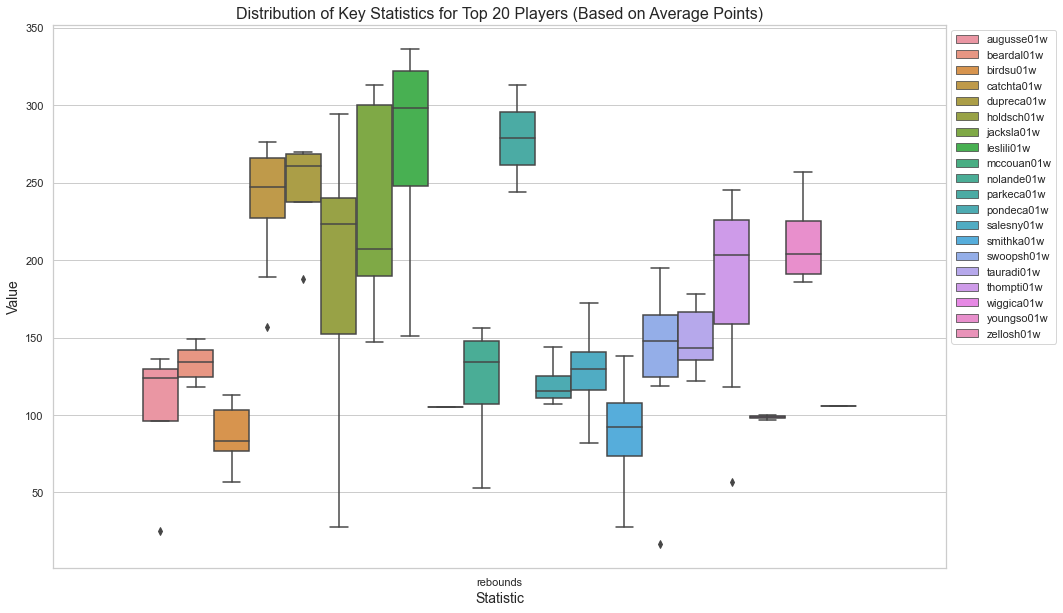

In [53]:
average_points = players_teams.groupby('playerID')['points'].mean().sort_values(ascending=False)
top_20_players = average_points.head(20).index
df_top_20 = players_teams[players_teams['playerID'].isin(top_20_players)]
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
sns.boxplot(x='variable', y='value', hue='playerID', data=pd.melt(df_top_20[['playerID','rebounds']], id_vars='playerID', var_name='variable', value_name='value'))
plt.xlabel('Statistic', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Distribution of Key Statistics for Top 20 Players (Based on Average Points)', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

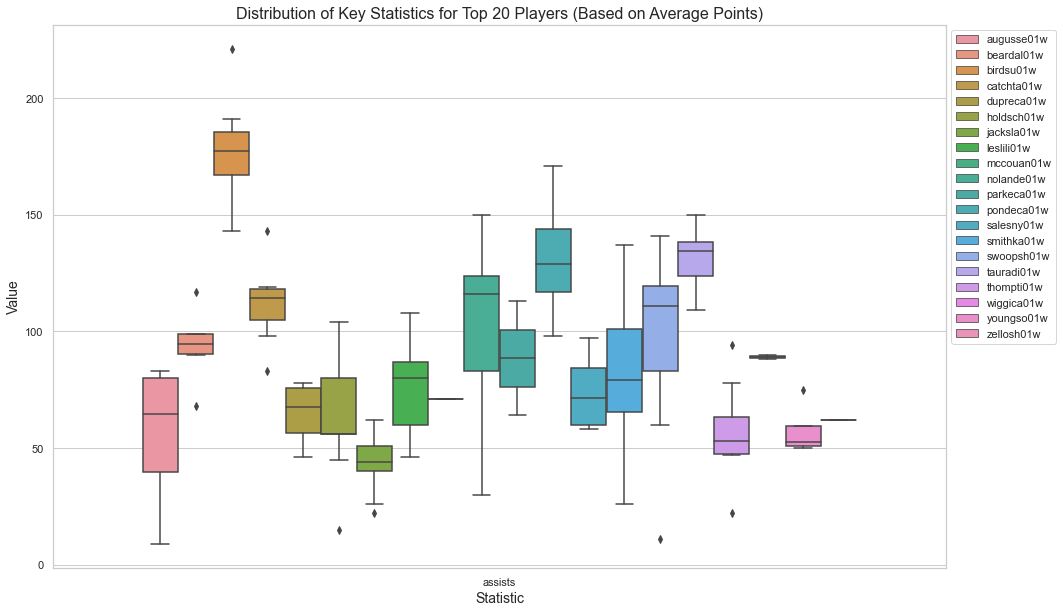

In [54]:
average_points = players_teams.groupby('playerID')['points'].mean().sort_values(ascending=False)
top_20_players = average_points.head(20).index
df_top_20 = players_teams[players_teams['playerID'].isin(top_20_players)]
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
sns.boxplot(x='variable', y='value', hue='playerID', data=pd.melt(df_top_20[['playerID', 'assists']], id_vars='playerID', var_name='variable', value_name='value'))
plt.xlabel('Statistic', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Distribution of Key Statistics for Top 20 Players (Based on Average Points)', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Separate Dataset into Train and Test**

Experimental pipeline using only teams.csv